<a href="https://colab.research.google.com/github/aravind-3105/Pytorch/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classifier for CIFAR10 Dataset

Neural Network shown in RRC Summer Session 28/05/2021

**Steps involved: <br>
1) Load and normalize the CIFAR10 training and test datasets using torchvision<br>
2) Define a Convolutional Neural Network<br>
3) Define a loss function<br>
4) Train the network on the training data<br>
5) Test the network on the test data**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

Relevant Doc Link: [Click here](https://pytorch.org/vision/stable/transforms.html)

In [2]:
transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


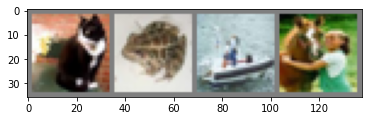

  cat  frog  ship horse


In [3]:
#function to show image
def printImg(img):
  #First normalise
  img = img/2 + 0.5
  #Convert to numpy
  npImg = img.numpy()
  plt.imshow(np.transpose(npImg,(1,2,0)))
  plt.show()

detaiter = iter(trainloader)
images,labels = detaiter.next()

printImg(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Make a convolutional neural network

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Loss Function and Optimiser

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.0005, momentum = 0.9)

In [9]:
for epoch in range(10):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs, labels = data
    #Zero-out parameter gradients
    optimizer.zero_grad()
    #Forward Propagate
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    #Backward Propagate
    loss.backward()
    #Optimise
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Training Done')


[1,  2000] loss: 1.557
[1,  4000] loss: 1.449
[1,  6000] loss: 1.421
[1,  8000] loss: 1.372
[1, 10000] loss: 1.362
[1, 12000] loss: 1.356
[2,  2000] loss: 1.312
[2,  4000] loss: 1.325
[2,  6000] loss: 1.293
[2,  8000] loss: 1.297
[2, 10000] loss: 1.282
[2, 12000] loss: 1.274
[3,  2000] loss: 1.212
[3,  4000] loss: 1.241
[3,  6000] loss: 1.231
[3,  8000] loss: 1.261
[3, 10000] loss: 1.245
[3, 12000] loss: 1.238
[4,  2000] loss: 1.181
[4,  4000] loss: 1.201
[4,  6000] loss: 1.215
[4,  8000] loss: 1.199
[4, 10000] loss: 1.188
[4, 12000] loss: 1.199
[5,  2000] loss: 1.162
[5,  4000] loss: 1.165
[5,  6000] loss: 1.170
[5,  8000] loss: 1.159
[5, 10000] loss: 1.142
[5, 12000] loss: 1.173
[6,  2000] loss: 1.133
[6,  4000] loss: 1.128
[6,  6000] loss: 1.134
[6,  8000] loss: 1.162
[6, 10000] loss: 1.118
[6, 12000] loss: 1.118
[7,  2000] loss: 1.085
[7,  4000] loss: 1.099
[7,  6000] loss: 1.114
[7,  8000] loss: 1.102
[7, 10000] loss: 1.113
[7, 12000] loss: 1.144
[8,  2000] loss: 1.079
[8,  4000] 

In [10]:
#Save model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


Test Model

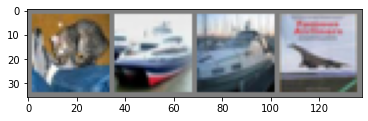

GroundTruth:    cat  ship  ship plane


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
printImg(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Test Accuracy

In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 55.6 %
Accuracy for class car   is: 63.5 %
Accuracy for class bird  is: 36.3 %
Accuracy for class cat   is: 36.4 %
Accuracy for class deer  is: 47.9 %
Accuracy for class dog   is: 37.2 %
Accuracy for class frog  is: 70.2 %
Accuracy for class horse is: 59.0 %
Accuracy for class ship  is: 67.7 %
Accuracy for class truck is: 61.6 %
